In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 데이터 시각화 
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#graphviz: 나무구조 시각화(.dot확장자 파일 불러오기 등)
import graphviz

In [2]:
df_raw = pd.read_csv("3. Big Data 분석/DIABETES.csv",encoding= 'cp949')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [3]:
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis =1, inplace =False)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.4,random_state=1234)

In [4]:
tree_uncustomized = GradientBoostingRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.893
Score on test set: 0.458


In [5]:
train_score =[]; test_score=[]
#min_samples_leaf: 입사귀 최소 자료수
para_n_tree = [n_tree * 1 for n_tree in range(1,1001)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#결과저장
df_score_n = pd.DataFrame()
df_score_n["Estimators"]= para_n_tree
df_score_n["TrainScore"]= train_score
df_score_n["TestScore"]=test_score

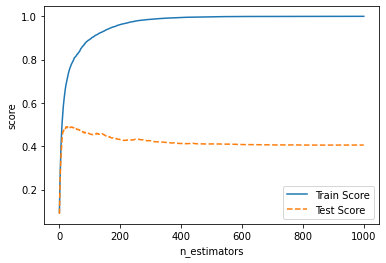

In [6]:
df_score_n.round(3)

plt.plot(para_n_tree,train_score,linestyle="-", label = "Train Score")
plt.plot(para_n_tree,test_score,linestyle="--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [7]:
train_score =[]; test_score=[]
#min_samples_leaf: 입사귀 최소 자료수
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]
for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234,min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]= para_leaf
df_score_leaf["TrainScore"]= train_score
df_score_leaf["TestScore"]=test_score

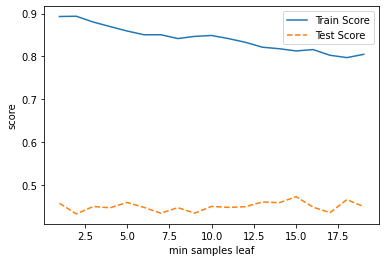

In [8]:
df_score_leaf.round(3)

plt.plot(para_leaf,train_score,linestyle="-", label = "Train Score")
plt.plot(para_leaf,test_score,linestyle="--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [9]:
#train 및 test설명력 결과저장
train_score =[]; test_score=[]
#min_samples_split: 분리 노드의 최소자료수
para_split =[n_split *2 for n_split in range(1,21)]
for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf=8,min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"]= para_split
df_score_split["TrainScore"]= train_score
df_score_split["TestScore"]= test_score

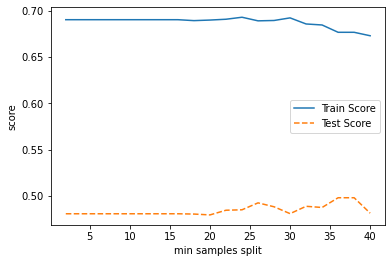

In [10]:
plt.plot(para_split,train_score,linestyle="-", label = "Train Score")
plt.plot(para_split,test_score,linestyle="--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [11]:
# max_depth: 최대 깊이 변경에 따른 모델 성능
#train 및 test설명력 결과 저장
train_score =[]; test_score=[]
#max_depth: 최대 깊이 변경
para_depth =[depth for depth in range(1,11)]
for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf=11, min_samples_split=22,max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_score_depth= pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score

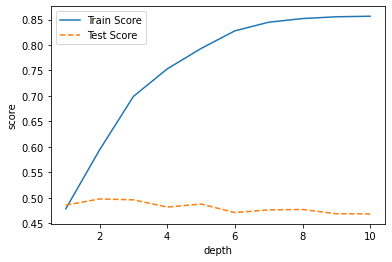

In [12]:
df_score_depth.round(3)

plt.plot(para_depth,train_score,linestyle="-",label ="Train Score")
plt.plot(para_depth,test_score,linestyle="--",label= "Test Score")
plt.ylabel("score")
plt.xlabel("depth")
plt.legend()

In [13]:
# max_depth: 최대 깊이 변경에 따른 모델 성능
#train 및 test설명력 결과 저장
train_score =[]; test_score=[]
#max_depth: 최대 깊이 변경
para_lr =[lr * 0.1 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234,min_samples_leaf=8, min_samples_split=20,max_depth=4, learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_score_lr= pd.DataFrame()
df_score_lr["LearningRate"]=para_lr
df_score_lr["TrainScore"]=train_score
df_score_lr["TestScore"]=test_score

In [14]:
#모델 설명력 확인
df_score_lr.round(3)
#모델 설명력 그래프 확인
plt.plot(para_l,train_score,linestyle="-",label ="Train Score")
plt.plot(para_l,test_score,linestyle="--",label= "Test Score")
plt.ylabel("score")
plt.xlabel("learning rate")
plt.legend()

NameError: name 'para_l' is not defined

In [ ]:
gb_final = GradientBoostingRegressor(learning_rate=0.1 ,min_samples_leaf=8,min_samples_split=20,max_depth=4,random_state=1234)
gb_final.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

In [ ]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

In [ ]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True,inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [ ]:
estimator = GradientBoostingRegressor(random_state=1234)
param_grid = {"criterion":["mse", "friedman_mse", "mae"], "max_features":["auto", "sqrt", "log2"], "max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf": para_leaf, "learning_rate": para_lr}
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

# 모델 평가 예측모델

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [67]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [68]:
df_raw = pd.read_csv("3. Big Data 분석/체질검사.csv", engine="python")

df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [69]:
df_raw["WEIGHT"] = df_raw["WEIGHT"] * 0.45
df_raw["HEIGHT"] = df_raw["HEIGHT"] * 2.54
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,163.4175,183.515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,75.6000,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,79.9875,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,66.4875,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,98.5500,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [70]:
df_raw["BMI"] = (df_raw["WEIGHT"] / (df_raw["HEIGHT"] * df_raw["HEIGHT"]) * 10000)
df_raw["BMI"].head()

0    48.523870
1    23.082595
2    26.422478
3    23.838617
4    37.293165
Name: BMI, dtype: float64

In [71]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis =1, inplace =False)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

In [72]:
lr_model = smf.ols(formula="FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data=df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=4)
dt_model.fit(df_train_x, df_train_y)

rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf=6, min_samples_split=14, max_depth=4)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 30,min_samples_leaf=11, min_samples_split=22, max_depth=4, learning_rate=0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 19 May 2021   Prob (F-statistic):           4.38e-68
Time:                        13:36:40   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [73]:
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]

In [74]:
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [75]:
#의사결정나무
dt_y_pred = dt_model.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [76]:
# 랜덤포레스트
rf_y_pred = rf_model.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [77]:
#그래디언트 부스팅
#예측 
gb_y_pred= gb_model.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

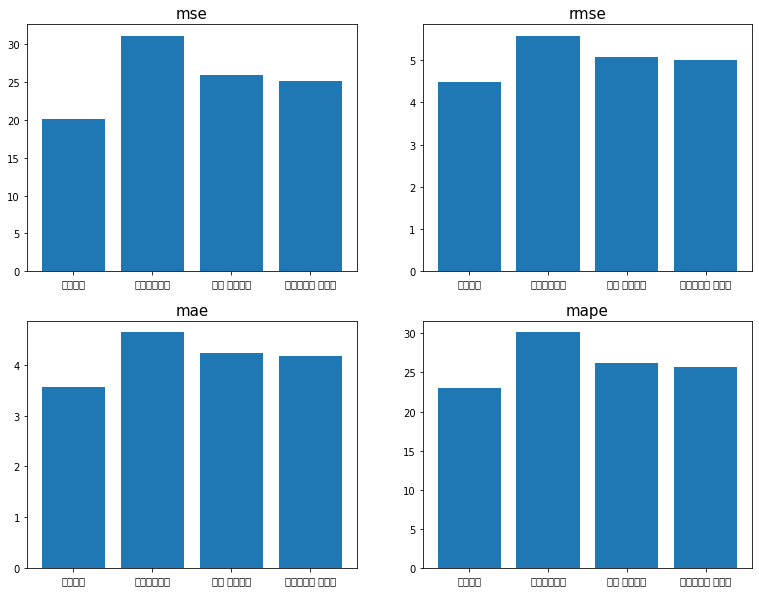

In [79]:
fig,ax = plt.subplots(2,2,figsize =(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)
ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)
ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)
ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix

파일 불러오기 df_raw = pd.read_csv("../data/IRIS.csv", engine='python', encoding='cp949')

df_raw.isnull().sum(axis = 0) #결측치 확인 및 처리

SyntaxError: invalid syntax (<ipython-input-2-3ecae0af84db>, line 13)